<div style="border:solid green 2px; padding: 20px">
<b>Привет, Иван!</b>

Меня зовут Александр, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-info">

Привет! Спасибо за ревью и полезные материалы) Постарался исправить ошибки
    
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Все необходимые импорты будут здесь

In [144]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Загрузим таблицу

In [145]:
data = pd.read_csv('/datasets/insurance.csv')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Огонь, данные на месте:)</div>

Таблица состоит из 5000 строк. В ней находятся данные о клиентах: пол, возраст, зарплата, количество членов семьи, страховые выплаты

In [146]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В данных есть небольшое количество повторов. Пропуски отсутствуют.

In [148]:
data.duplicated().sum()

153

In [149]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо:)</div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении признаков на обратную матрицу качество линейной регрессии не изменится.

**Обоснование:** Возьмем формулу обучения и запишем ее в виде:

$$
w_1 = (X_1^T X_1)^{-1} X_1^T y
$$

где $X_1 = XP$ - признаки, умноженные на обратную матрицу, согласно условию задачи. Подставим это значение в формулу:

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Раскроем скобки:

$$
w_1 = (X^T P^T X P)^{-1} X^T P^T y = (P^T)^{-1} P^{-1} (X X^T)^{-1} X^T P^T y
$$

По условию, матрица P - обратимая, поэтому $(P^T)^{-1}*P^T = E$, где E - единичная матрица, а выражение $(X X^T)^{-1} X^T y = w$. При умножении матрицы на единичную матрицу получаем ту же самую матрицу. Таким образом, после преобразований получаем:

$$
w_1 = P^{-1}w
$$

Запишем $a_1 = X_1 w_1$ в виде:

$$
a_1 = XPP^{-1}w = Xw
$$

Получаем, $a_1 = Xw = a$

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 

    
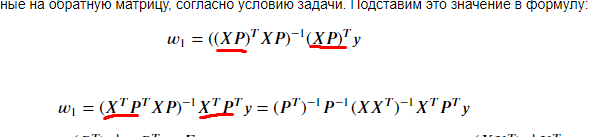
    
Некорректно раскрыл: $(XP)^T \neq X^T P^T$  
    
-----------------------------------------
    
Чтобы сократить тебе $(P^T)^{-1}$ и $(P^T)$ они должны стоять рядом друг с другом, иначе сократить не получится. 
    
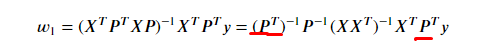
    
Матрицы переставлять местами нельзя: $AB \neq BA$, так как будет совсем другое значение уже. Тут более подробно
    
+  http://www.mathprofi.ru/deistviya_s_matricami.html
    
------------------------------------
    
+  У нас есть ряд свойств:
    $$
(AB)^T=B^T A^T \tag 1
$$
$$
(AB)^{-1} = B^{-1} A^{-1} \tag 2
$$
$$
A A^{-1} = A^{-1} A = E \tag 3
$$
$$
AE = EA = A \tag 4
$$
$$
A(BC) = (AB)C \tag 5
$$
  
Воспользуемся первым свойством:    
+  Для начала раскроем $(XP)^T$ в примере $((XP)^T X P)^{-1}$, и получим $(P^T X^T X P)^{-1}$ (по аналогии закончи до конца)
    
Воспользуемся свойством 2:
    
+  $(P^T(X^TX)P)^{-1}$, пусть тут $A=P^T$, $B=(X^TX)P)^{-1}$, тогда $(P^T(X^TX)P)^{-1} = ((X^TX)P)^{-1} P^{T^{-1}}$ Далее продолжи аналогично
</div>





<div class="alert alert-info">

Я понял, да) Очень давно таким не занимался и путаюсь, хотя для меня с первого раза все выглядело логично)

</div>

Тогда если не спешить и раскрывать все по шагам, должно получиться вот так:

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

$$
w_1 = (P^T (X^T X) P)^{-1} P^T X^T y
$$

$$
w_1 = ((X^T X)P)^{-1}(P^T)^{-1} P^T X^T y
$$

$$
w_1 = ((X^T X)P)^{-1} X^T y
$$

$$
w_1 = P^{-1}(X^T X)^{-1} X^T y
$$

$$
w_1 = P^{-1}w
$$

И дальше подставляет w_1 в a_1

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Отлично, теперь все корректно:)</div>

## Алгоритм преобразования

**Алгоритм**

- Создать случайную матрицу и проверить ее на обратимость
- Разделить исходную таблицу на признаки и целевой признак
- Преобразовать признаки через умножение на случайную матрицу
- Обучить исходные и преобразованные данные на модели линейной регрессии и сравнить результаты

**Обоснование**

Как было показано выше, при умножении признаков на обратную матрицу качество линейной регрессии не изменится.

## Проверка алгоритма

Создадим случайную квадратную матрицу с размером 4, 4, т.к. при ее умножении на матрицу признаков должна получиться матрица такого же размера как и исходная

In [150]:
P = np.random.rand(4, 4)
P

array([[0.28577512, 0.41400481, 0.88552631, 0.61392699],
       [0.81796087, 0.63585216, 0.10794501, 0.87672662],
       [0.91818446, 0.6045407 , 0.87071876, 0.08250875],
       [0.21380695, 0.68134346, 0.25911296, 0.43628834]])

Проверим ее на обратимость

In [151]:
P_inverted = np.linalg.inv(P)
P_inverted

array([[-0.50225943,  0.85979844,  0.75027279, -1.16290441],
       [-0.84242204, -0.58063021,  0.24239043,  2.30636524],
       [ 1.02418368, -0.58230462,  0.27521111, -0.32308762],
       [ 0.95346589,  0.83124015, -0.90966318, -0.54797164]])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> На обратимость можно вот еще так проверить: Если определитель квадратной матрицы $P$ не равен нулю, значит у нее есть обратная</div>

Разделим данные на признаки и целевой признак. Выделим обучающую и тестовую выборки. Масштабируем признаки.

In [152]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [153]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, 
                                                                            random_state=12345)

In [154]:
scaler = StandardScaler()
x_train = scaler.fit_transform(features_train)
x_test = scaler.transform(features_test)

Умножим исходные преобразованные данные на случайную матрицу

In [155]:
x_p_train = x_train @ P
x_p_test = x_test @ P

С помощью функции обучим модель линейной регрессии для разных наборов данных

In [156]:
def check_model(features_train, features_test, target_train, target_test):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    r2 = r2_score(target_test, predictions)
    return r2

In [157]:
model_1 = check_model(x_train, x_test, target_train, target_test)
model_1

0.4352275712702668

In [158]:
model_2 = check_model(x_p_train, x_p_test, target_train, target_test)
model_2

0.4352275712702667

Получили одинаковые значения

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо;)


Оставлю немного полезного материала:

+  https://academy.yandex.ru/handbook/ml
+  https://habr.com/ru/post/595281/
</div>

**Вывод**

Перед нам стояла задача разработать и обосновать механизм преобразования данных, по которому было бы сложно восстановить персональную информацию клиентов страховой компании. Качество модели при этом не должно было ухудшиться.

Для начала мы проверили предположение, что при умножении признаков на обратимую матрицу качество линейной регрессии не изменяется. Это дало нам механизм преобразования. 

Далее мы создали случайную квадратную матрицу, проверили ее на обратимость. Подготовили данные к обучению. На исходных и преобразованных данных мы получили одинаковое качество по метрике R2. 

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Иван, получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>

Оставлю хороший учебник по ML:
+  https://academy.yandex.ru/handbook/ml
    
Немного новостей с мира DL(вдруг заинтересует):
+  https://habr.com/ru/company/ods/blog/686962/
    
Вот тут проходят всякие соревнования, можешь себя попробовать:
+  https://hacks-ai.ru/championships#competitions
    

Возможно, что нить пригодится:  
+  https://drive.google.com/file/d/1r8CJHH_hwDM16l1Pnpb4KJzoJFrJ5XRi/view
+  https://arxiv.org/ftp/arxiv/papers/2201/2201.00650.pdf
+  https://github.com/slgero/testovoe
    
    
Курс от МФТИ математика для DS:
    
+  https://www.youtube.com/watch?v=xccjt6lOoow&list=PLk4h7dmY2eYHHTyfLyrl7HmP-H3mMAW08&index=1
    
    
Тут много соревнований/лекций:
    
+  https://ods.ai/
    
stepic NLP/CV:
    
+  https://stepik.org/course/54098/syllabus
+  https://stepik.org/course/50352/syllabus
    
Еще есть от ВШЭ:
    
+  https://www.youtube.com/watch?v=mwjQaNt8qxk&list=PLEwK9wdS5g0og-DcF1apxutSM0GDLHz_3&ab_channel=%D0%A4%D0%9A%D0%9D%D0%92%D0%A8%D0%AD%E2%80%94%D0%B4%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F
+  https://github.com/hse-ds/iad-deep-learning
    
    
    
    
Удачи в следующих проектах!!!
    
 


</div>